# CS009A Homework 4 (07/27/2023)
**Wilton Phung**

## Introduction to the Dataset
**Links to Dataset**

Website data was sourced: https://www.basketball-reference.com/awards/mvp.html#mvp_NBA

Data csv file: http://localhost:8889/lab/tree/Homework%204/Last50MVPs.csv

**Description of Dataset** 

This dataset is statistics of the NBA MVPs, the statistics include season averages per game, shooting percentages, and winshares. 


## Section 0: 
**Overview:** 

Essentially in this first section, I am sourcing the dataset from the website "www.basketball-reference.com", so credit goes to the website for all the data used in this assignment. 

The method I used to source this dataset was from a YouTube tutorial video: "Web Scraping NBA Stats With Python: Data Project [Part 1 of 3]" by Dataquest. I do want to note that I although I am following the code to extract the data from the website, my data set is a bit different and what I am using my data for is different. In the video he explains that he is going to use the data to create a machine learning model that can hopefully predict the MVP for the next season, which doesn't fit this assignment. What I am doing with the code is just analyzing it through 4 questions as per the outline of this homework assignment. Please let me know if you have any questions or concerns in regards to how I completed this assignment or my use of outside sources.

**Link to video**: https://www.youtube.com/watch?v=JGQGd-oa0l4&t=911s&ab_channel=Dataquest


**Link to video's GitHub Code:** https://github.com/dataquestio/project-walkthroughs/blob/master/mvp/web_scraping.ipynb

# Section 1:

In [1]:
import requests 

url = "https://www.basketball-reference.com/awards/mvp.html#mvp_NBA"
data = requests.get(url)
with open("MostValublePlayers.html", "w", encoding="utf-8") as fHandle:
    fHandle.write(data.text)

Essentially I have the url of the website and in order to get the table of data that I want, I am sending the website a request and then downloading its response (which is the html webpage) and this response is being opened onto a file named "MostValublePlayers.html" in "w+" which allows me to write and if the file exists, override so I am left with a copy of the website in the file. 

Note the ' encoding="utf-8" ' is a piece I had to add after getting an error when opening the file so I found the troubleshoot on stackoverflow, although full disclosure I have no clue what this does.

Here is the link: https://stackoverflow.com/questions/27092833/unicodeencodeerror-charmap-codec-cant-encode-characters

In [2]:
from bs4 import BeautifulSoup

with open("MostValublePlayers.html", encoding="utf-8") as fHandle:
    page = fHandle.read()

soup = BeautifulSoup(page, 'html.parser')
soup.find('tr', class_="over_header").decompose()
mvp_table = soup.find_all(id="div_mvp_NBA")

So I am importing BeautifulSoup and then opening the file to read it, then I initialize BeautifulSoup to parse the page which allows me to extract the data that I want, in this case it's the "NBA Winners" MVP table. I am removing the "over_header" because it is an extra row on the top of the table and labels "Per Game", "Shooting", and "Advanced" and I don't need since it doesn't label any important information and when I import it into pandas, it won't have any unnecessary clutter since it would be an extra row. BeautifulSoup then parses the page and extracts the element with the id = "div_mvp_NBA" which is the "NBA Winners" MVP table and this is the table with the data I want to work with. I am then saving the dataset table in a variable "mvp_table".

In [3]:
import pandas as pd

mvps = pd.read_html(str(mvp_table))[0]
mvps

,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,2022-23,NBA,Joel Embiid,(V),28,PHI,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259
1,2021-22,NBA,Nikola Jokić,(V),26,DEN,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296
2,2020-21,NBA,Nikola Jokić,(V),25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301
3,2019-20,NBA,Giannis Antetokounmpo,(V),25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
4,2018-19,NBA,Giannis Antetokounmpo,(V),24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1959-60,NBA,Wilt Chamberlain,(V),23,PHW,72,46.4,37.6,27.0,2.3,NaN,NaN,0.461,NaN,0.582,17.0,0.245
64,1958-59,NBA,Bob Pettit,(V),26,STL,72,39.9,29.2,16.4,3.1,NaN,NaN,0.438,NaN,0.759,14.8,0.246
65,1957-58,NBA,Bill Russell,(V),23,BOS,69,38.3,16.6,22.7,2.9,NaN,NaN,0.442,NaN,0.519,11.3,0.206
66,1956-57,NBA,Bob Cousy,(V),28,BOS,64,36.9,20.6,4.8,7.5,NaN,NaN,0.378,NaN,0.821,8.8,0.178


I am then importing pandas and using it to read the "mvp_table" which is the dataset table from the .html file I have of the website. I'm using pandas to read the .html table after I declare the table as a string in order for pandas to be able to read it since by default it is not a string. Then I have only taking the first element because I actually get a list of dataframes where the first index is the table that I want to use. So now I have a dataframe I can work with. 

In [4]:
mvps.head(50).to_csv("Last50MVPs.csv")

This turns the dataframe into a csv, however I am only taking the latest 50 MVPs which is 50 from the top because if you look at the dataframe above, the bottom players have some "NaN" in some of their stats columns because those stats were either not tracked or recorded (steals and blocks weren't recorded until the 1973-74 season), or in the case of the 3P%, the 3-point-line had not yet been introduced (introduced in the 1979-1980 season). So I am only taking the latest 50 of these entries out of the 68 total, because this corresponds with the 1973-74 season, when steals and blocks were being recorded. 

# Section 2: 
**Overview:**

This section will be going over the actual homework assignment and answering the 4 following questions by analyzing the acquired dataset. Also note for the following section, my outputs will be in the form of an f-string that also helps describe the data and its significance. 

## Question 1: 
**What is the mean age of the last winners in the last 50 seasons? What is the standard deviation of the ages? Who were the youngest and oldest winners and what were their ages?**

In [5]:
mvpdf = pd.read_csv("Last50MVPs.csv")

mvpdf.describe()

mean_age = mvpdf.describe().loc['mean', "Age"]
std_dev_age = mvpdf.describe().loc['std', "Age"]
youngest_age = mvpdf["Age"].min()
oldest_age = mvpdf["Age"].max()

age_as_list1 = mvpdf.index[mvpdf["Age"] == youngest_age].tolist()
for e in age_as_list1:
    age = e 
youngest_player = mvpdf.loc[age, "Player"]

age_as_list2 = mvpdf.index[mvpdf["Age"] == oldest_age].tolist()
for e in age_as_list2:
    age = e
oldest_player = mvpdf.loc[age,"Player"]

print(f'The average age of MVPs is: {mean_age:.2f}')
print(f'The standard deviation of the ages is: {std_dev_age:.2f}')
print(f'The youngest of the last 50 MVPs was {youngest_player} at {youngest_age} years old.')
print(f'The oldest of the last 50 MVPs was {oldest_player} at {oldest_age} years old.')
print(f'Fun fact: As of the 2023 season {youngest_player} and {oldest_player} are actually the respective youngest and oldest MVPs all-time!\n(Remember this data set is only for the latest 50 MVPs out of the total 68 so far.)')

The average age of MVPs is: 27.54
The standard deviation of the ages is: 2.83
The youngest of the last 50 MVPs was Derrick Rose at 22 years old.
The oldest of the last 50 MVPs was Karl Malone at 35 years old.
Fun fact: As of the 2023 season Derrick Rose and Karl Malone are actually the respective youngest and oldest MVPs all-time!
(Remember this data set is only for the latest 50 MVPs out of the total 68 so far.)


Alright so in order to analyze my data, I have to read the csv file with the data in to pandas and I set a variable equal to the dataframe to help with writing code that is easily readable. Then I used the .describe() method in pandas to do the math for me (I will include what the .describe() method outputs below). I then used the .describe() method to get the mean and standard deviation then using the .loc attribute I got the values of these and set a variable to equal the value of the cell and then I use the variable in an f-string to output my data in order to have code that is easily readable. For the youngest and oldest data, I used the .min() and .max() method on the dataframe's "Age" column to get the youngest and oldest age. Then after consulting google, I found a way to index the row that correspond's to the cell which is just by using dataframe.index[dataframe["column"] == value], and to my understanding, this returns a panda datatype similar to an array since a dataframe is a 2D array so in order for me to be able to access the value or in other words just the number of the row, I used .tolist() which turned the panda datatype into a list with one element which is the value of the row I want. Then in order to access the value, since the list only has one element, I used a for-loop and set a variable, "age", equal to the value of the element. Then I used .loc with the "age" variable and "Player" column to find the player corresponding with the age. I feel like the output explains the data relatively well so there is not much of a need for me to go over it. 

Here's the link to the google consult: https://sparkbyexamples.com/python/pandas-get-index-from-dataframe/?expand_article=1

In [6]:
print(type(mvpdf.index[mvpdf["Age"] == youngest_age]))
print(mvpdf.index[mvpdf["Age"] == youngest_age])
print(mvpdf.index[mvpdf["Age"] == youngest_age].tolist())

list = mvpdf.index[mvpdf["Age"] == youngest_age].tolist()

for i in list:
    age = i
print(i)
print(type(i))

<class 'pandas.core.indexes.numeric.Int64Index'>
Int64Index([12], dtype='int64')
[12]
12
<class 'int'>


So here I included what the .index and .tolist() functions do just for reference and also what my for-loop does in the above question. So my goal in using the .index function is to find the index of the "youngest_age" (the minimum value in the "Age" column of the MVP data table) and then use the value of the index (12) in the .loc function. I want to have something like dataframe.loc[index, "Player"] to find the player corresponding to the age, based off of the age. However, because the .index function returns a panda datatype, not an integer, I can't directly use it in the .loc function because I get an error (this is what I tried originally but it did not work) since the .loc function expects the index to be an integer. So, I have to manipulate it in such a way that I can access the integer value of the index. To do so, I chose to use the .tolist() function to turn the panda datatype into a list, [12] which has one element and then accessed the value of the element through a for-loop and set it equal to the "age" variable and it's datatype is now an integer which I can use in the .loc function. Hopefully this explains what I did a bit more clearly.

In [7]:
mvpdf.describe()

,Unnamed: 0,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,44.000000,50.000000,50.000000,50.000000
mean,24.50000,27.540000,77.360000,37.58800,26.972000,9.654000,5.930000,1.512000,1.360000,0.515580,0.286659,0.802280,15.722000,0.259740
std,14.57738,2.829942,6.965689,2.83496,3.877462,3.721488,2.721963,0.545722,1.074947,0.038856,0.139693,0.079626,2.815648,0.036803
min,0.00000,22.000000,49.000000,30.40000,15.500000,3.300000,1.300000,0.500000,0.100000,0.420000,0.000000,0.524000,8.400000,0.190000
25%,12.25000,25.250000,76.000000,35.60000,24.600000,6.450000,4.125000,1.025000,0.600000,0.496750,0.244750,0.761250,14.150000,0.232750
50%,24.50000,27.000000,80.000000,37.65000,27.100000,9.850000,5.450000,1.550000,0.950000,0.516000,0.325000,0.802000,15.750000,0.261000
75%,36.75000,29.000000,82.000000,39.22500,29.700000,12.850000,7.275000,1.800000,1.950000,0.538000,0.388750,0.858000,17.800000,0.288750
max,49.00000,35.000000,82.000000,43.80000,35.000000,17.600000,12.800000,3.200000,4.100000,0.604000,0.454000,0.921000,21.200000,0.322000


This is just a visualization of all the data I get through using the .describe() method.

## Question 2: 
**Calculate and determine which player had the highest offensive output/contributions.**

In [8]:
points_per_minute = ( mvpdf["PTS"] / mvpdf["MP"] )
maxptspmp = points_per_minute.max()

assists_per_minute = ( mvpdf["AST"] / mvpdf["MP"] )
maxastpmp = assists_per_minute.max()

offensive_output = points_per_minute + assists_per_minute
maxoffout = offensive_output.max()

offensive_index = offensive_output.index[offensive_output == maxoffout].tolist()
for a in offensive_index:
    rowA = a 
player1 = mvpdf.loc[rowA,"Player"]

points_index = points_per_minute.index[points_per_minute == maxptspmp].tolist()
for b in points_index:
    rowB = b
player2 = mvpdf.loc[rowB,"Player"]

assists_index = assists_per_minute.index[assists_per_minute == maxastpmp].tolist()
for c in assists_index:
    rowC = c 
player3 = mvpdf.loc[rowC,"Player"]
    
print(f"The player with the highest offensive output and contributions was {player1} with a rating of {maxoffout:.2f}.")
print(f"The player with the highest scoring output was {player2} with {maxptspmp:.2f} points per minute.")
print(f"The player with the highest assist output was {player3} with {maxastpmp:.2f} assists per minute.\n")

total = 0
for d in offensive_output:
    total += d 
avgoffout = total / len(offensive_output)

total = 0
for e in points_per_minute:
    total += e 
avgptspmp = total / len(points_per_minute)

total = 0
for f in assists_per_minute:
    total += f
avgastpmp = total / len(assists_per_minute)

print(f"For reference, the average offensive output and contributions rating is {avgoffout:.2f} the average scoring output is {avgptspmp:.2f} points per minute, and the average assist ouput is {avgastpmp:.2f} assists per minute.")

The player with the highest offensive output and contributions was Russell Westbrook with a rating of 1.21.
The player with the highest scoring output was Giannis Antetokounmpo with 0.97 points per minute.
The player with the highest assist output was Magic Johnson with 0.34 assists per minute.

For reference, the average offensive output and contributions rating is 0.88 the average scoring output is 0.72 points per minute, and the average assist ouput is 0.16 assists per minute.


## Question 2.5:
**Calculate and determine which players had the highest defensive contributions.**

In [9]:
steals_per_minute = ( mvpdf["STL"] / mvpdf["MP"] ) 
maxstlcon = steals_per_minute.max()

blocks_per_minute = ( mvpdf["BLK"] / mvpdf["MP"] )
maxblkcon = blocks_per_minute.max()

defensive_output = steals_per_minute + blocks_per_minute 
maxdefcon = defensive_output.max()

defensive_index = defensive_output.index[defensive_output == maxdefcon].tolist()
for g in defensive_index:
    rowG = g 
player4 = mvpdf.loc[rowG,"Player"]

steals_index = steals_per_minute.index[steals_per_minute == maxstlcon].tolist()
for h in steals_index:
    rowH = h
player5 = mvpdf.loc[rowH,"Player"]

blocks_index = blocks_per_minute.index[blocks_per_minute == maxblkcon].tolist()
for i in blocks_index:
    rowI = i 
player6 = mvpdf.loc[rowI,"Player"]

print(f"The player with the highest defensive contibutions was {player4} with a rating of {maxdefcon:.2f}.")
print(f"The player with the highest steals contributions was {player5} with {maxstlcon:.2f} steals per minute.")
print(f"The player with the highest block contributions was {player6} with {maxblkcon:.2f} blocks per minute.\n")
      
total = 0
for j in defensive_output:
    total += j 
avgdefcon = total / len(defensive_output)

total = 0
for k in steals_per_minute:
    total += k 
avgstlcon = total / len(steals_per_minute)

total = 0
for l in blocks_per_minute:
    total += l
avgblkcon = total / len(blocks_per_minute)

print(f"For reference, the average defensive contributions rating is {avgdefcon:.2f} the average steals contribution is {avgstlcon:.2f} steals per minute, and the average blocks contribution is {avgblkcon:.2f} blocks per minute.\n")

The player with the highest defensive contibutions was Kareem Abdul-Jabbar with a rating of 0.14.
The player with the highest steals contributions was Michael Jordan with 0.08 steals per minute.
The player with the highest block contributions was Kareem Abdul-Jabbar with 0.10 blocks per minute.

For reference, the average defensive contributions rating is 0.08 the average steals contribution is 0.04 steals per minute, and the average blocks contribution is 0.04 blocks per minute.



So this is a rather unorthodox way to examine offensive output and defensive contributions, I belive the NBA actually tracks similar stats but using different statistics and calculations, however given the limited data I am working with, this will be a substitute. Essentially I just take one column and divide it with another, in this case I am dividng the "PTS" column by the "MP" column, essentially dividing points per game, by minutes played per game, to determine "points per minute" which in this case is a measure of scoring output. And since assists are an aspect of offense (so are rebounds, but the stats represent total rebound as opposed to offensive rebounds so I can't use rebounds) I am doing the same but with the assist column to get "assists per minute". I add the "points per minute" column with the "assists per minute" column to get a measure of total offensive contributions per minute which in this case will amount to being "offensive output". And just for fun and out of curiousity I also just wanted to see which player had the highest scoring and assist output, which in this case is just "points per minute" and "assists per minute" so I included that. When it comes to the defensive output/contributions it's essentially the same idea as offensive output except with "STL" and "BLK" summed together to find the total defensive contribution, which in this case is steals and blocks (again ignoring rebounds because the dataset does not differentiate between offensive and defensive rebounds). The method used to find the highest number of each stat is the same as the method used to find the youngest and oldest players, I used .max() and .min() on the series, since adding two columns returns a column which is a series. Similarly, to find the corresponding player for the stat I used the same method to find the index and turned the index into a list and used a for-loop to access the value of the index and the used .loc() to find the player name. As for calculating the averages, I used a for-loop and since I can treat the series as a list, I iterated through the series and summed up all the values in the series and divided that total by the length of the series. I elected to add the reference just so that we can compare the highest number with the average so that it is easier to gauge and appreciate the top performers in each category since in most of these stats, the MVPs outperform the average among other MVPs which in my opinion, is an impressive feat. Again, I feel like the outputs describe what the data represents well enough so I won't really analyze it seeing as I have already gone over how I decided to calculate the data.

## Question 3:
**Who had the best scoring efficiency in terms of highest field goal percentage relative to points?**

(Another one because I'm not sure if 2.5 should count since it's the exact same as 2 but with different stats, so here's another!)

In [10]:
efficiency = mvpdf["FG%"] * mvpdf["PTS"]
maxeff = efficiency.max()

efficiency_list = efficiency.index[efficiency == maxeff].tolist()
for value in efficiency_list:
    row = value 
player_name = mvpdf.loc[row, "Player"]

print(f"The player with the highest scoring efficiency was {player_name} with a rating of {maxeff:.2f}.")

totaleff = 0
for val in efficiency:
    totaleff += val
avgeff = totaleff / len(efficiency)
print(f"For reference, the average scoring efficiency was {avgeff:.2f}.")

The player with the highest scoring efficiency was Michael Jordan with a rating of 18.73.
For reference, the average scoring efficiency was 13.90.


So this is another unorthodox way of measuring player efficiency, and I know for a fact that the NBA does have a statistic for this although I'm not sure how it's calculated. For the sake of this assignment, I am just going to take the product of field goal percentages "FG%" and points (per game) "PTS", and the highest number we'll consider to be the most efficient, since more points with higher field goal should be mroe effiencent. So as I described, I took the "FG%" column and multiplied it with the "PTS" column and used .max() to find the highest value of the resulting series product. And as is a pattern, I used .index to find the row that contains the "Player" and used .tolist() to turn the pandas datatype into a list so that I can access the value of the index thorugh a for-loop and then use the value in the .loc() method to get the corresponding player. Then to calculate the average, similar to before, I have a variable initialized at 0 and then as I iterate through the series, I am summing all values in the series and storing it in the variable "totaleff" and then the average is just a calculation of totaleff / len(efficiency). So one way to interpret the output of this section is just how impressive Jordan's scoring proficiency was seeing as he played in his prime in the 90s which is nearly three decades ago and his score is nearly 5 ratings above the average among other MVPs. 

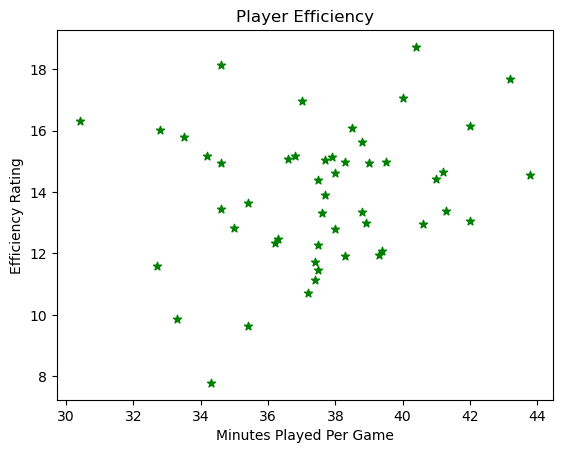

In [11]:
import matplotlib.pyplot as plt

plt.title("Player Efficiency")
x = mvpdf["MP"]
plt.xlabel("Minutes Played Per Game")
y = efficiency
plt.ylabel("Efficiency Rating")
plt.scatter(x, y, c = 'g', marker = "*")

Just for fun here's a plot of Efficiency Rating in relation to minutes played per game, higher is more efficient, to the right is more minutes played. I suppose more efficient would be higher to the left since it would mean higher efficiency in less time. 

## Question 4:
**Plot and determine what range of points and field goal percentage most MVPs fall under, note any outliers.**

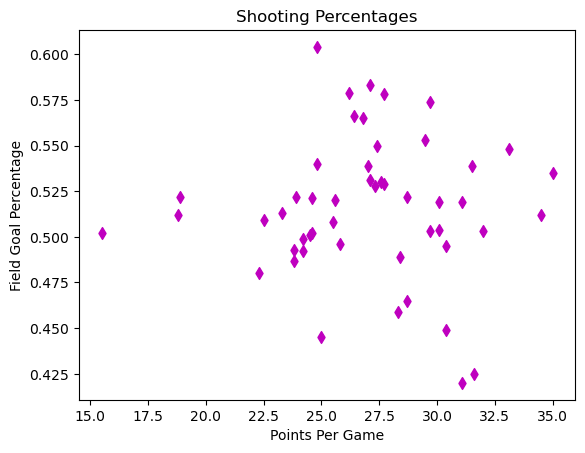

In [12]:
import matplotlib.pyplot as plt

plt.title("Shooting Percentages")
x = mvpdf["PTS"]
plt.xlabel("Points Per Game")
y = mvpdf["FG%"]
plt.ylabel("Field Goal Percentage")
plt.scatter(x, y, c = "m",  marker = 'd')

From this plot, it can be determined that the majority of MVPs scored over 22.5 points per game with an ourlier at just over 15 points. In comparison most MVPs were shooting around 50%, with at least 75% shooting over 47.5% with an outlier shooting 60%. There are two large clusters, one between 22.5 and 25 points and between 47.5 and 50% shooting and another around 27.5 points and 52.5% shooting. 

# Conclusion:

**Final Statements:**

Well thank you for taking this journey with me going through NBA MVP data, I hope some of it want interesting, I honestly did enjoy going through each step of this assignment and I did end up learning a lot more than I though, especially with how pandas works and how easy it is to plot data with matplotlib. Just to reiterate, Section: 1 does kind of borrow code in order for me to be able to extract the dataset, however, Section: 2 was entirely my own code with the exception of going to google to figure out how to get the row of a cell in pandas and turn this index into an integer I can use in the .loc() function. But if there are any questions or concerns with my completion of the assignment, please feel free to ask.